# EECS192 Sring 2015 Track Finding from 1D line sensor data

In [1]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.ndimage as ndi  # useful for 1d filtering functions
# comment the following line to have external plots
%matplotlib inline

In [3]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

Line scan plotting function.


In [5]:
def plot_frame(linearray):
    nframes = np.size(linearray)/128
    n = range(0,129)
    print 'number of frames', nframes
    for i in range(0, nframes-1):
        setup_graph(title='$x[n]$', x_label='$n$', y_label='row'+str(i)+' $ xa[n]$', fig_size=(15,2))
        plt.subplot(1,3,1)
        _ = plt.plot(n,linearray[i,:])
        plt.subplot(1,3,2)
        _ = plt.plot(n,linearray[i+1,:])
    # plot simple difference between frames
        plt.subplot(1,3,3)
        _ = plt.plot(n,linearray[i+1,:] - linearray[i,:])
        plt.ylabel('Frame n+1 - Frame n')

In [36]:
### inputs:
# linescans - An array of length n where each element is an array of length 128. Represents n frames of linescan data.

### outputs:
# track_center_list - A length n array of integers from 0 to 127. Represents the predicted center of the line in each frame.
# track_found_list - A length n array of booleans. Represents whether or not each frame contains a detected line.
# cross_found_list - A length n array of booleans. Represents whether or not each fram contains a crossing.

def find_track(linescans):
    n = len(linescans)
    track_center_list = n * [64]
    track_found_list = n * [True]
    cross_found_list = n * [False]
    ### Code to be added here
    ###
    ###
    
    return track_center_list, track_found_list, cross_found_list

In [8]:
linea = np.genfromtxt('ee192_sp14_camera_testdata_a.csv', delimiter=",")
nframes = np.size(linea)/128
print 'number of frames', nframes

linescans = []
for i in range(0, nframes):
    line = linea[i,0:128]
    linescans.append(line)

track_center_list, track_found_list, cross_found_list = find_track(linescans)
for i, (track_center, track_found, cross_found) in enumerate(zip(track_center_list, track_found_list, cross_found_list)):
    print 'scan # %d center at %d. Track_found = %s, Cross_found = %s' %(i,track_center,track_found, cross_found)

number of frames 13


NameError: name 'find_track' is not defined

### Set A linescans

number of frames 13
[ 49214.  47687.  49121.  49969.  50387.  50689.  53480.  51979.  53402.
  54012.  54822.  54290.  56556.  57201.  57537.  58021.  58342.  58227.
  59244.  59479.  59356.  58790.  60044.  56859.  58004.  57931.  58300.
  56356.  56038.  55777.  55529.  55544.  56774.  54814.  55810.  55703.
  55098.  54807.  54255.  54083.  53875.  52814.  53088.  53265.  52830.
  53571.  52505.  48723.  21733.  17043.  16987.  16228.  16301.  15618.
  34528.  50039.  50251.  50185.  50365.  50505.  51426.  51207.  51821.
  51031.  51686.  50905.  49378.  51292.  52529.  50871.  52140.  51190.
  51077.  49348.  52029.  51360.  52130.  52159.  52320.  51035.  52308.
  51428.  51476.  49813.  50539.  48794.  48602.  47305.  46968.  45183.
  42274.  41098.  38903.  34879.  33640.  30788.  28531.  25519.  23690.
  21067.  19845.  18026.  17603.  17060.  17176.  16420.  17228.  16427.
  17777.  17172.  18990.  17825.  18878.  17665.  19250.  18528.  19477.
  19283.  20843.  20668.  22356

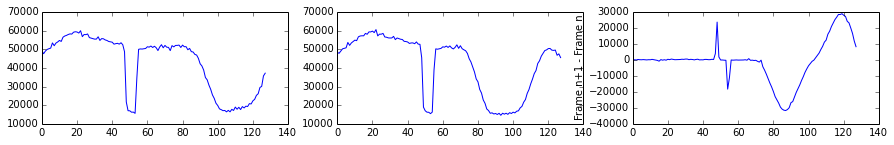

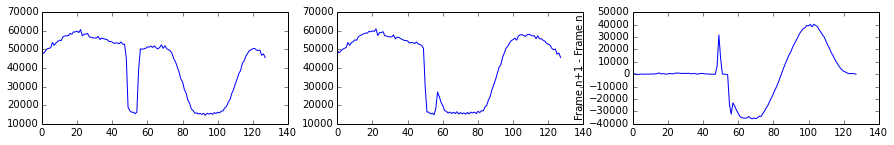

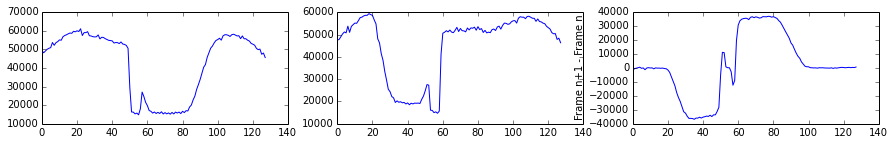

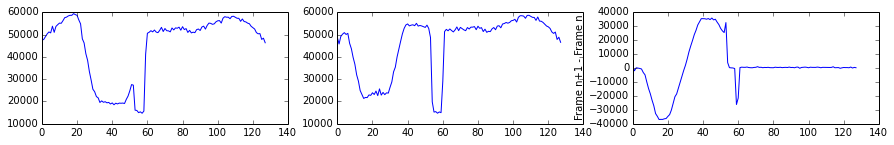

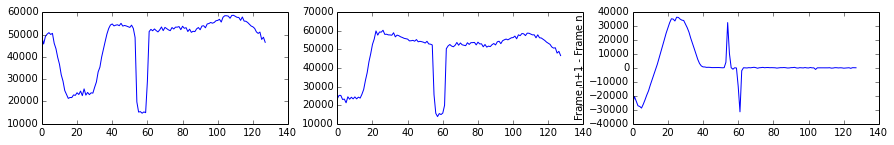

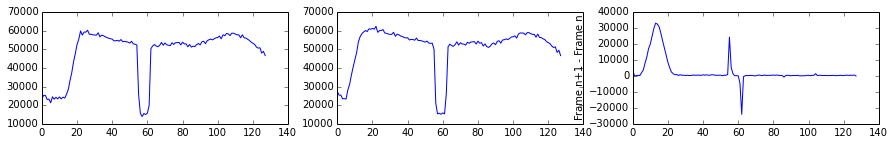

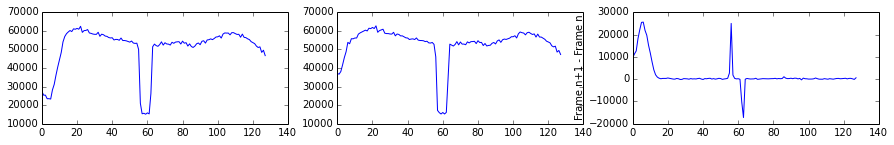

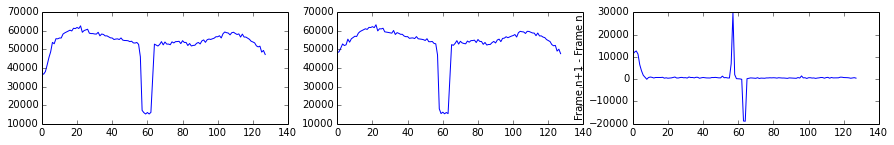

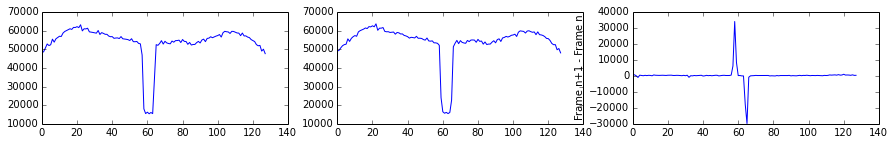

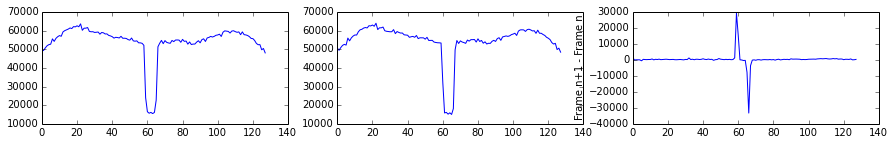

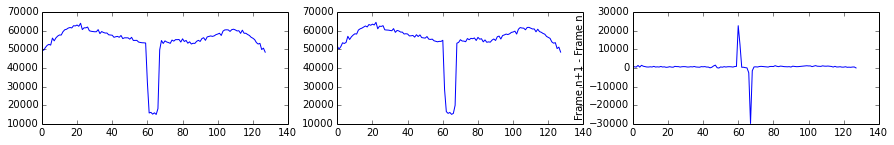

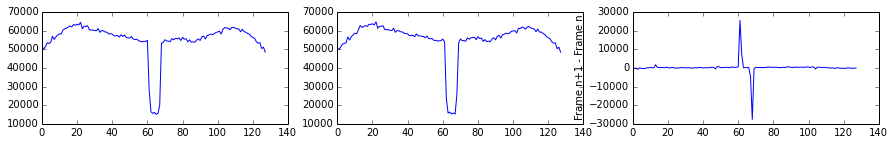

In [6]:
n = range(0,129)
linea = np.genfromtxt('ee192_sp14_camera_testdata_a.csv', delimiter=",")
plot_frame(linea)
line1 = linea[0,:]
print line1

### Set B line scans

number of frames 13
[ 51729.  52500.  53790.  55330.  55476.  54907.  58300.  56449.  57804.
  58561.  59286.  58917.  60570.  61190.  61416.  61918.  61979.  61129.
  62274.  61773.  61671.  48483.  19942.  17502.  18146.  17166.  18263.
  40410.  58382.  58506.  58572.  58777.  60053.  57987.  59105.  58986.
  58408.  58115.  57315.  57496.  57319.  56028.  56664.  56724.  56281.
  57329.  56120.  56322.  56319.  56014.  55747.  56627.  55276.  55216.
  55472.  54610.  54396.  54410.  54375.  54589.  55514.  55403.  55656.
  55011.  55661.  54939.  54248.  55224.  56501.  54601.  56007.  55308.
  54709.  54196.  55806.  55158.  55875.  55932.  55992.  54640.  56188.
  55075.  55123.  53576.  54423.  53245.  53656.  53636.  54792.  55297.
  54339.  56224.  56610.  55297.  56997.  57354.  57609.  56963.  57424.
  57993.  58106.  58508.  57114.  59385.  60066.  59704.  59598.  58688.
  59649.  59181.  58896.  58463.  58249.  56742.  58085.  55761.  56196.
  55328.  54757.  53632.  53258

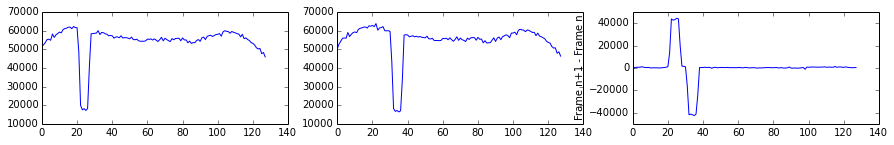

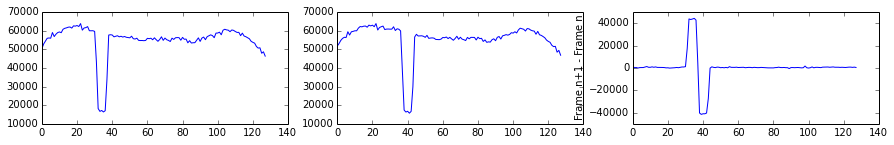

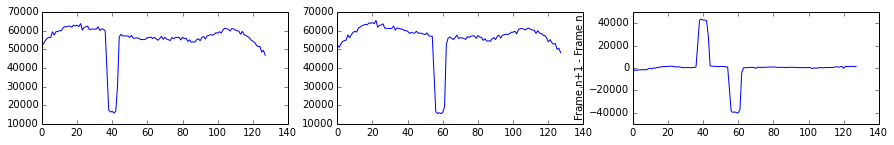

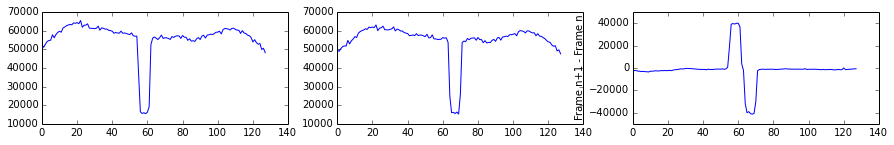

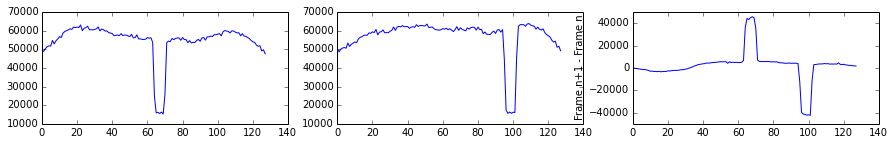

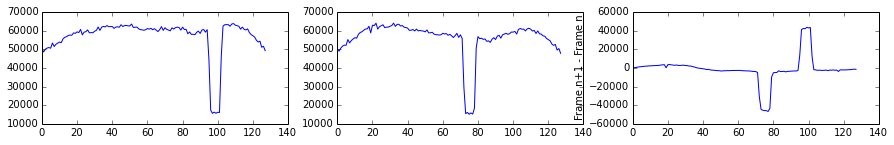

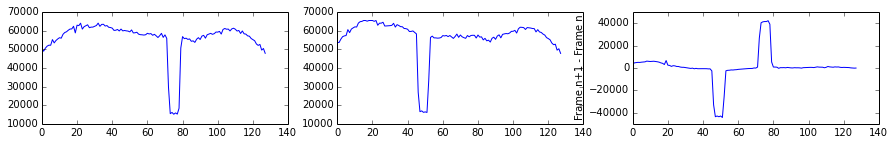

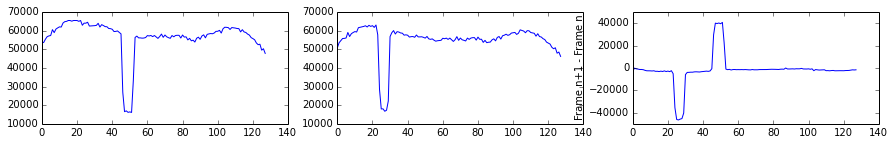

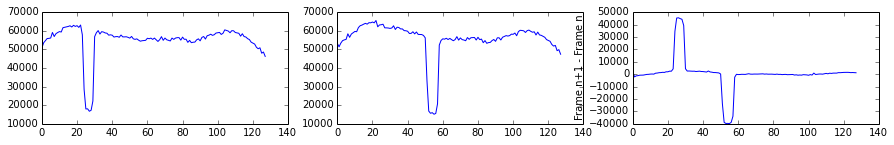

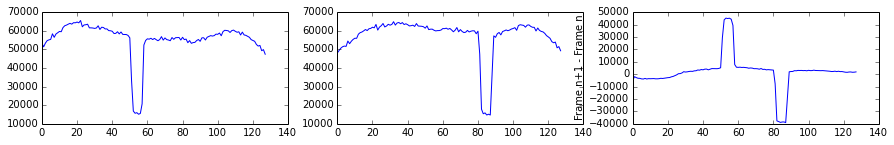

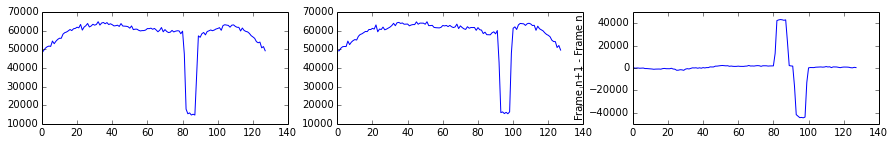

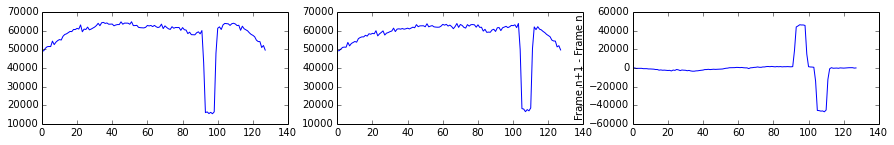

In [7]:
lineb = np.genfromtxt('ee192_sp14_camera_testdata_b.csv', delimiter=",")
plot_frame(lineb)
line1 = lineb[0,:]
print line1

### Set C linescans

number of frames 9
[ 46044.  46506.  48432.  49063.  49469.  49283.  51867.  50337.  51815.
  52679.  53579.  53487.  55452.  56097.  56445.  57018.  57348.  56929.
  58135.  58109.  57889.  58221.  59827.  56653.  58007.  57952.  58859.
  56840.  56426.  56294.  56385.  55989.  57068.  55062.  55912.  55563.
  55174.  54780.  54094.  53802.  53728.  52764.  52929.  52962.  45385.
  21121.  18677.  17964.  18186.  18008.  19493.  42852.  51556.  51339.
  51681.  50838.  50670.  50549.  50935.  50747.  51774.  51306.  51650.
  51178.  51781.  50943.  50420.  51054.  52505.  50672.  51993.  50968.
  50838.  50544.  52093.  51272.  52104.  52118.  52204.  50909.  52569.
  51535.  51741.  50052.  50903.  49754.  50083.  49895.  51199.  51710.
  50624.  52328.  52833.  51513.  53080.  53445.  53754.  53328.  53892.
  54593.  54486.  54831.  53646.  55669.  56445.  56146.  55838.  54705.
  55198.  54306.  52584.  50461.  48920.  44883.  43514.  40077.  37524.
  34397.  32371.  28828.  27062.

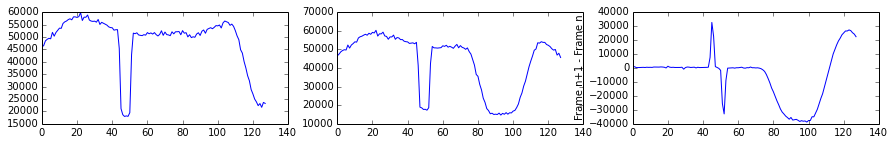

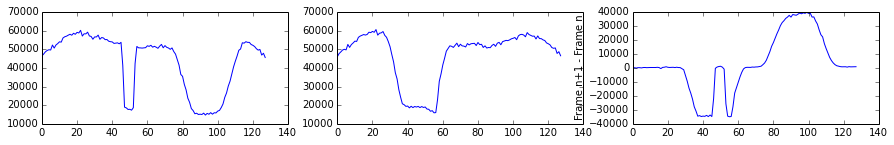

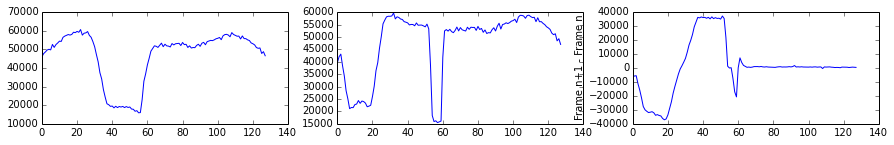

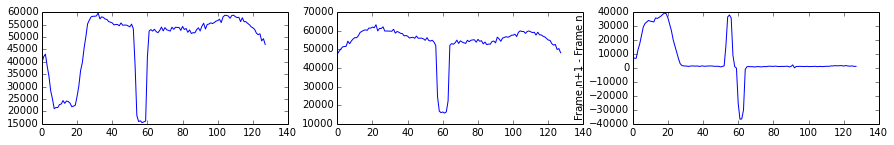

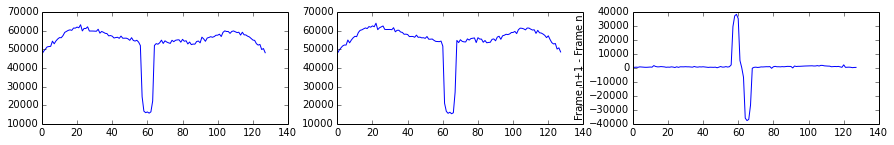

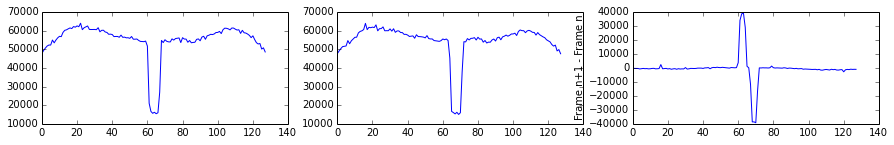

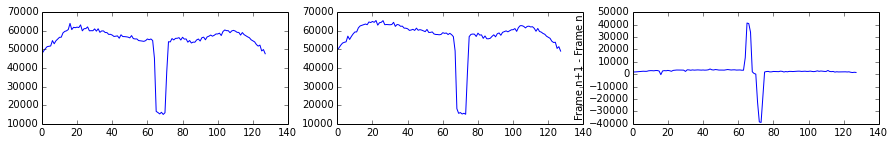

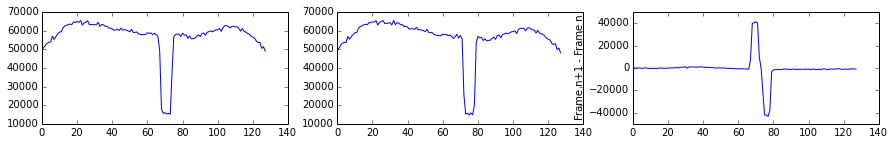

In [40]:
linec = np.genfromtxt('ee192_sp14_camera_testdata_c.csv', delimiter=",")
plot_frame(linec)
line1 = linec[0,:]
print line1

linec= [ 46044.  46506.  48432.  49063.  49469.  49283.  51867.  50337.  51815.
  52679.  53579.  53487.  55452.  56097.  56445.  57018.  57348.  56929.
  58135.  58109.  57889.  58221.  59827.  56653.  58007.  57952.  58859.
  56840.  56426.  56294.  56385.  55989.  57068.  55062.  55912.  55563.
  55174.  54780.  54094.  53802.  53728.  52764.  52929.  52962.  45385.
  21121.  18677.  17964.  18186.  18008.  19493.  42852.  51556.  51339.
  51681.  50838.  50670.  50549.  50935.  50747.  51774.  51306.  51650.
  51178.  51781.  50943.  50420.  51054.  52505.  50672.  51993.  50968.
  50838.  50544.  52093.  51272.  52104.  52118.  52204.  50909.  52569.
  51535.  51741.  50052.  50903.  49754.  50083.  49895.  51199.  51710.
  50624.  52328.  52833.  51513.  53080.  53445.  53754.  53328.  53892.
  54593.  54486.  54831.  53646.  55669.  56445.  56146.  55838.  54705.
  55198.  54306.  52584.  50461.  48920.  44883.  43514.  40077.  37524.
  34397.  32371.  28828.  27062.  24984.  23

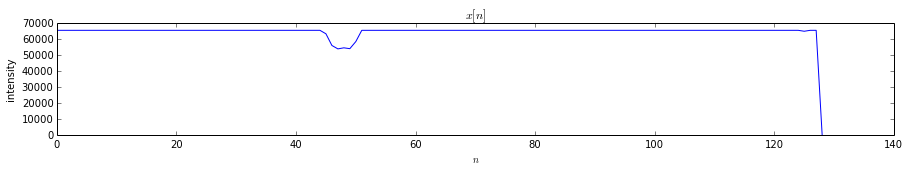

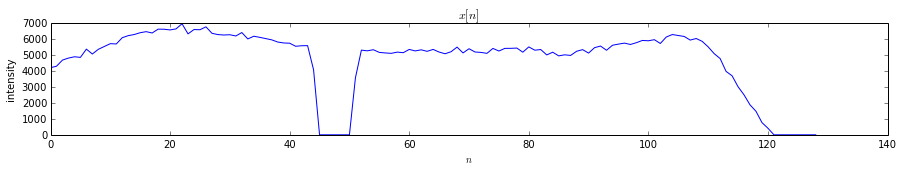

In [41]:
# clipped data - examples with exposure gain not set correctly

linec = np.genfromtxt('ee192_sp14_camera_testdata_c.csv', delimiter=",")
setup_graph(title='$x[n]$', x_label='$n$', y_label='intensity', fig_size=(15,2))
print 'linec=',linec[0,:]
print 'n=', n
#plt.plot(n,linec[0,:])
linescale = np.zeros(129)
linescale1 = np.zeros(129)
#print 'linescale=', linescale[:]
lines1 = linec[0,:]
for i in range(0,128):
    pixel = linec[0,i]
    linescale[i] = min(65535,3.0*pixel)
    linescale1[i] = max(0, 0.2*pixel - 5000)
#print 'linescale=', linescale[:]    
#plt.subplot(1,3,1)
_ = plt.plot(n,linescale)
setup_graph(title='$x[n]$', x_label='$n$', y_label='intensity', fig_size=(15,2))
#plt.subplot(1,3,2)
_ = plt.plot(n,linescale1)
